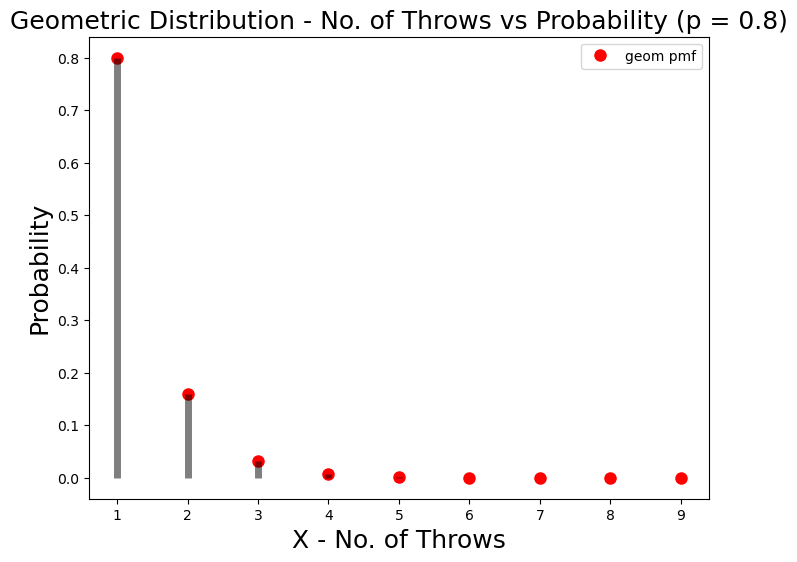

In [2]:
from scipy.stats import geom
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p = 0.8  # Probability of success on each trial

geom_pd = geom.pmf(X, p)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(X, geom_pd, 'ro', ms=8, label='geom pmf')
ax.vlines(X, 0, geom_pd, colors='black', lw=5, alpha=0.5)

plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Throws", fontsize="18")
plt.title("Geometric Distribution - No. of Throws vs Probability (p = 0.8)", fontsize="18")
plt.legend()

plt.show()


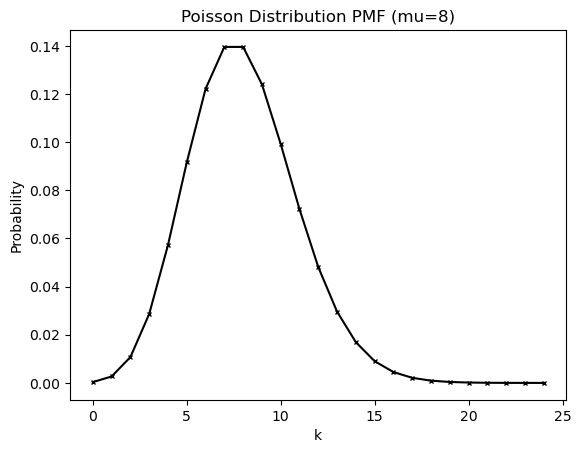

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

k = np.arange(0, 25)
pmf = poisson.pmf(k, mu=8)
pmf = np.round(pmf, 5)  # Round off to the fifth decimal place

plt.plot(k, pmf, marker='x', color='black', ms=3.5)
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Poisson Distribution PMF (mu=8)')
plt.show()


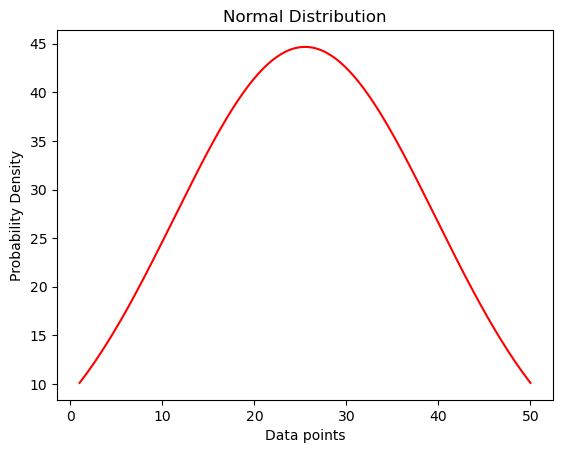

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(1, 50, 200)


def normal_dist(x, mean, sd):
    prob_density = (np.pi * sd) * np.exp(-0.5 * ((x - mean) / sd) ** 2)
    return prob_density


mean = np.mean(x)
sd = np.std(x)


pdf = normal_dist(x, mean, sd)


plt.plot(x, pdf, color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.show()


(array([1.49545492e-02, 4.70673009e-03, 1.50849999e-03, 4.71898720e-04,
        1.68973011e-04, 4.99039463e-05, 2.18876958e-05, 4.37753915e-06,
        0.00000000e+00, 8.75507830e-07]),
 array([6.96236103e-03, 4.56947319e+01, 9.13825015e+01, 1.37070271e+02,
        1.82758041e+02, 2.28445810e+02, 2.74133580e+02, 3.19821349e+02,
        3.65509119e+02, 4.11196889e+02, 4.56884658e+02]),
 <BarContainer object of 10 artists>)

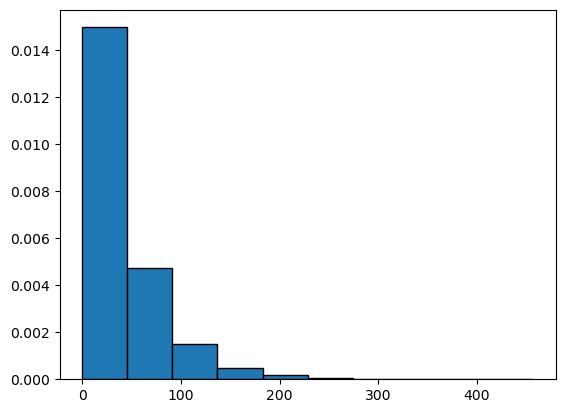

In [5]:
from scipy.stats import expon
import matplotlib.pyplot as plt
#generate exponential distribution with sample size 25000
x = expon.rvs(scale=40, size=25000)
#create plot of exponential distribution
plt.hist(x, density=True, edgecolor='black')

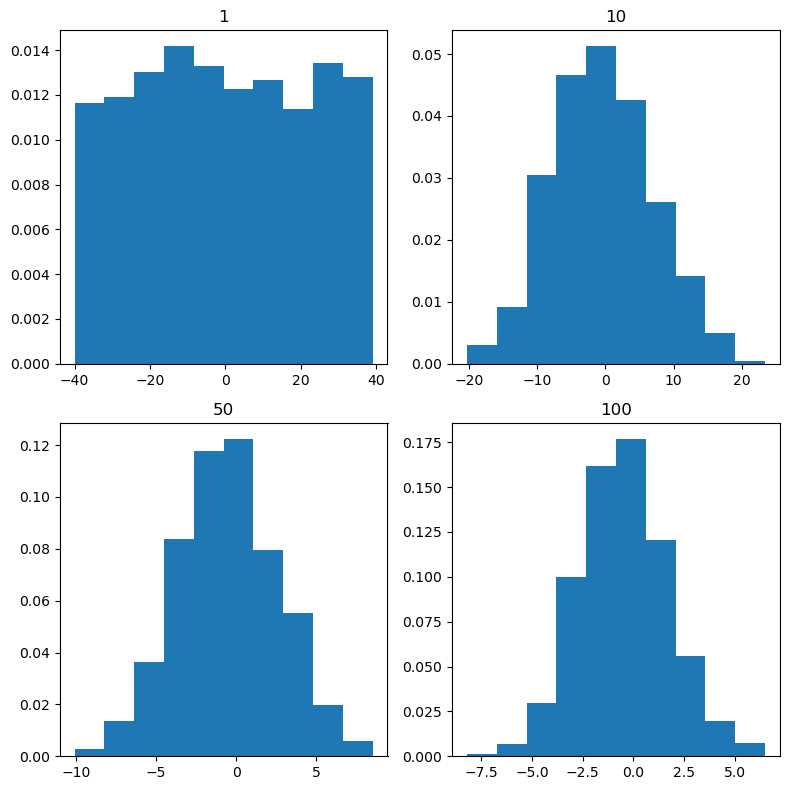

In [7]:
import numpy
import matplotlib.pyplot as plt


num = [1, 10, 50, 100]


means = []


for j in num:
   
    numpy.random.seed(1)
    x = [numpy.mean(numpy.random.randint(-40, 40, j)) for _ in range(1000)]
    means.append(x)

k = 0


fig, ax = plt.subplots(2, 2, figsize=(8, 8))

for i in range(0, 2):
    for j in range(0, 2):
        
        ax[i, j].hist(means[k], 10, density=True)
        ax[i, j].set_title(label=num[k])
        k = k + 1

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize
# generate an independent variable
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-17.495657
1,-9.595960,-13.068815
2,-9.191919,-11.216379
3,-8.787879,-20.260937
4,-8.383838,-9.204680


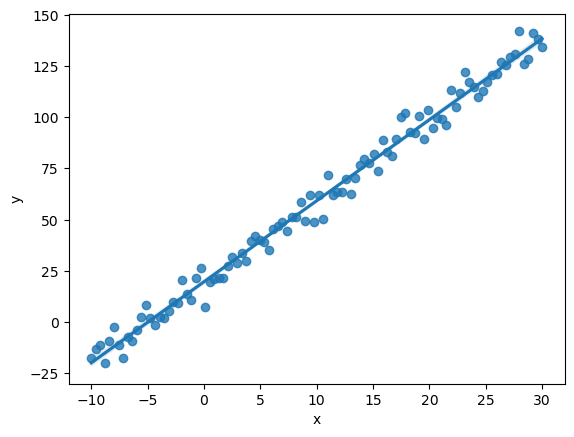

In [9]:
sns.regplot(x='x', y='y', data = df)
plt.show()


In [10]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     7860.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.18e-95
Time:                        12:06:56   Log-Likelihood:                -306.02
No. Observations:                 100   AIC:                             616.0
Df Residuals:                      98   BIC:                             621.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5616      0.687     28.482      0.000      18.199      20.925
x              3.9634      0.045     88.656      0.000       3.875       4.052
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.516
Skew:                           0.155   Prob(JB):                        0.772
Kurtosis:                       2.834   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
def MLE_Norm(parameters):
# extract parameters
 const, beta, std_dev = parameters
# predict the output
 pred = const + beta*x
# Calculate the log-likelihood for normal distribution
 LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
# Calculate the negative log-likelihood
 neg_LL = -1*LL
 return neg_LL
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 306.01864093448586
        x: [ 1.956e+01  3.963e+00  5.162e+00]
      nit: 26
      jac: [-1.137e-05 -1.137e-05 -5.684e-06]
     nfev: 124
     njev: 31
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>